In [13]:
import numpy as np
import matplotlib.pyplot as plt
import random


In [7]:
def Sphere(x):
    z= np.sum(np.square(x))
    return z;

In [8]:
#parameter setting
d=10
xMin, xMax = -100, 100
vMin, vMax = -0.2*(xMax-xMin),.2*(xMax-xMin)
MaxItn = 3000
ps = 10
c1 = 2
c2 = 2
w = 0.9-((.9-.4)/MaxItn)*np.linspace(0, MaxItn, MaxItn)
def limitV(v):
    for i in range(len(v)):
        if v[i]>vMax:
            v[i]=vMax
        if v[i]<vMin:
            v[i]=vMin
    return v
def limitx(x):
    for i in range(len(x)):
        if x[i]>xMax:
            x[i]=xMax
        if x[i]<xMin:
            x[i]=xMin
    return x

In [9]:
#algo
def optimization():
    class particle():
        def __init__(self):
            self.position = np.random.uniform(xMin, 50,[ps, d])
            self.velocity = np.random.uniform(vMin, vMax,[ps, d])
            self.cost = np.zeros(ps)
            self.cost[:]=Sphere(self.position[:])
            self.pbest = np.copy(self.position)
            self.pbest_cost = np.copy(self.cost)
            self.index = np.argmin(self.pbest_cost)
            self.gbest = self.pbest[self.index]
            self.gbest_cost = self.pbest_cost[self.index]
            self.Bestcost = np.zeros(MaxItn)
        def evaluate(self):
            for it in range(MaxItn):
                for i in range(ps):
                    self.velocity[i] = (w[it]*self.velocity[i]+c1*np.random.rand(d)*(self.pbest[i]-self.position[i])+c2*np.random.rand(d)*(self.gbest-self.position[i]))
                    self.velocity[i]=limitV(self.velocity[i])
                    self.position[i] = self.position[i]+self.velocity[i]
                    self.position[i] = limitx(self.position[i])
                    self.cost[i] = Sphere(self.position[i])
                    if self.cost[i]<self.pbest_cost[i]:
                        self.pbest[i]=self.position[i]
                        self.pbest_cost[i] = self.cost[i]
                        if self.pbest_cost[i]<self.gbest_cost:
                            self.gbest = self.pbest[i]
                            self.gbest_cost = self.pbest_cost[i]
                self.Bestcost[it] = self.gbest_cost
        def plot(self):
            plt.semilogy(self.Bestcost)
            plt.ylim(10e-120,10e20)
            plt.xlim(0,3000)
            print(self.gbest_cost)
    a = particle()
    a.evaluate()
    a.plot()    

3.302036620163509e-60


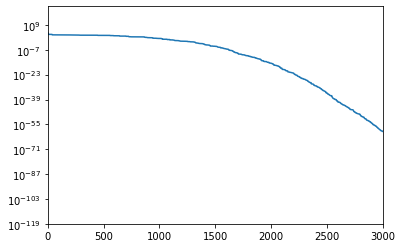

In [10]:
optimization()

In [18]:
X = np.random.uniform(-100, 50, [10,10])
print(X)

[[-97.54604952   8.62037226 -49.3627687   46.27691897  -9.72392658
   31.00357738 -63.48824918 -37.45776105 -51.39529991   7.99390222]
 [ 33.37546635 -25.10255795 -56.91971155 -29.05547122  19.40132985
   19.28594869 -23.64234118 -70.36221075 -39.07962809  33.51653767]
 [-58.76603029 -49.67525477  17.26660249  23.00122079  -6.88216922
   36.55902497 -97.16475197 -99.50557735  37.18003711 -24.3767489 ]
 [-33.65675584 -30.55982951 -45.64330399  49.92243224 -10.61292787
  -36.75087356 -60.59712416  20.47039739 -40.87306563  10.00244251]
 [-40.26378633  46.97907214 -67.82649153   1.37321844 -81.50550277
  -79.09668785 -55.70242465 -68.58453867  12.5355376   46.61581531]
 [ 16.34051899 -91.49753378 -34.1085199   43.00185327 -86.6523066
   19.70979667 -46.41748774 -95.73149479 -36.51705567  29.20469463]
 [-85.76575268  18.3684837  -45.91376416 -76.15420352  38.16400606
  -78.31507      9.95660436 -99.01825413 -63.33213918 -68.04812017]
 [-18.00401939   8.66783992  46.8054383  -89.18037131 -9